# `COCODataAPI` usage example

This notebook will show the main features that has been added to interface with the COCO dataset. These features
should be accessible for all other supported datasets.

In [1]:
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import cv2

from dataset_interface.coco import COCODataAPI
from dataset_interface.utils import draw_labeled_boxes

We must first specify the location for the API to look for images and annotations:

In [2]:
data_dir = '/run/media/minh/Data/WindowsLocations/Documents/data/coco/'
config_file = '../configs/sample_coco_configs.yml'
coco_api = COCODataAPI(data_dir, config_file)

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


We can query for all sub categories given a category name at each level. 

In [3]:
indoor_cat_names = coco_api.get_sub_category_names('indoor')
print(indoor_cat_names)

{84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}


We can query for all images that that contain a given category with the API function `get_images_in_category`.
This returns a collection of `ImageInfo` objects which contain the image's metadata.

In [4]:
images = coco_api.get_images_in_category('indoor')
image_with_book = images[154431]

# print attributes of 
print(''.join('{: <10}: {}\n'.format(k, v) for k, v in image_with_book.__dict__.items()))

_id       : 154431
_file_name: 000000154431.jpg
_image_path: /run/media/minh/Data/WindowsLocations/Documents/data/coco/images/val2017/000000154431.jpg
_url      : http://images.cocodataset.org/val2017/000000154431.jpg



We can also query for images containing a list of categories using the API function `get_images_in_categories`.
This returns the mapping:

`{ <image_id>: { 'info': ImageInfo, 'bounding_boxes': { category_id: [ BoundingBox ] } } }`

In [5]:
def plot_category(category_names, plot_width, image_id=None):
    # convert names to ID's
    cat_ids = [coco_api.category_names[cat_id] for cat_id in category_names]

    # select a random image_id if not specified
    images_and_boxes = coco_api.get_images_and_boxes_in_categories(cat_ids)
    if image_id is None:
        image_id = np.random.choice(list(images_and_boxes.keys()))
    image_info = images_and_boxes[image_id]['info']
    box_dict = images_and_boxes[image_id]['bounding_boxes']

    # collect all bounding boxes for the specified categories in the selected image into a list
    boxes = []
    for box_list in box_dict.values():
        boxes.extend(box_list)

    # create a dictonary which map from category ID's to category names (for visualization only)
    class_dict = {}
    for cat_id, cat in coco_api.categories.items():
        class_dict[cat_id] = cat.name
    # Display the image
    image = cv2.imread(image_info.image_path)
    img_height, img_width = image.shape[:2]
    plot_height = plot_width * img_height / img_width  # preserve image ratio
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     # convert color so PLT displays correctly
    fig, ax = plt.subplots(1, figsize=(plot_height, plot_width))
    box_img = draw_labeled_boxes(image, boxes, class_dict)
    ax.imshow(box_img)
    plt.show()

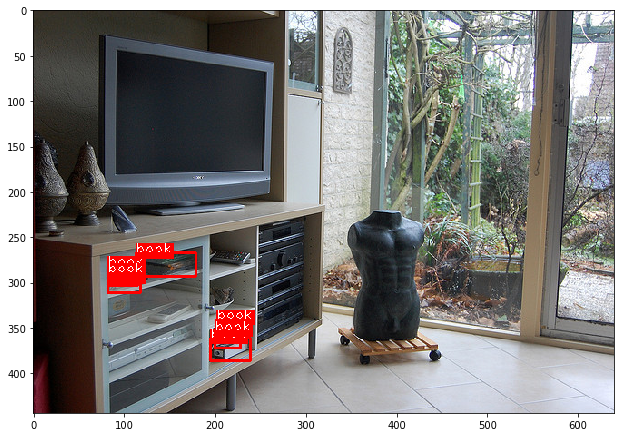

In [6]:
plot_category(['book'], 15, image_with_book.id)

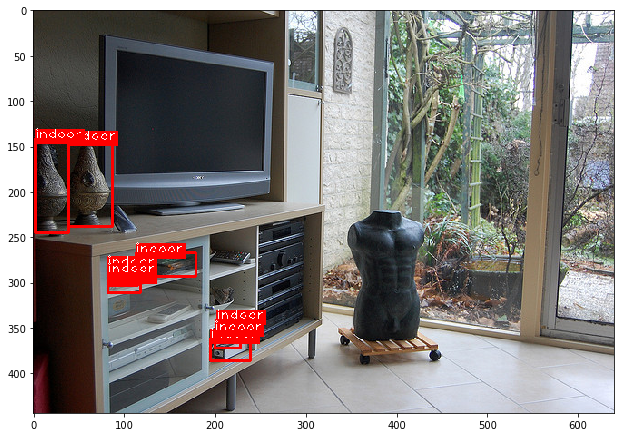

In [7]:
plot_category(['indoor'], 15, image_with_book.id)

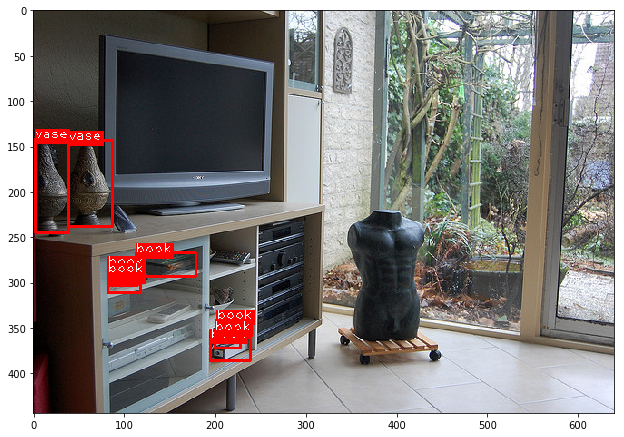

In [8]:
plot_category(['book','vase'], 15, image_with_book.id)

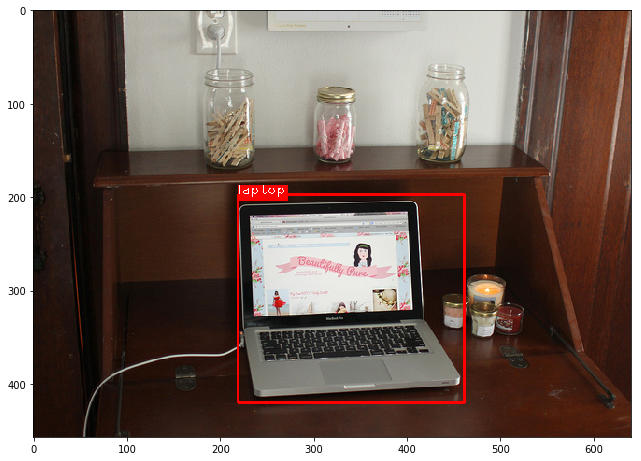

In [9]:
plot_category(['book', 'laptop'], 15)